# CNN classifier evaluation
In this notebook we will evaluate our classifier constructed in previous notebook. We will use *data/test* folder that conatins images, that our network has never seen before.

In [14]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import numpy as np

## Loading the model from memory

In [15]:
model = keras.models.load_model('best_model')

## Preparing the test data
This time we do not need to introduce any advanced transformations to image data. The only thing we did was to normalize pixel values to <0,1> interval and to decrease image size to 128x128 pixels.

In [16]:
def create_test_datagen():
    return ImageDataGenerator(
        rescale=1./255,
    )

def create_flow(datagen, directory):
    return datagen.flow_from_directory(
        directory = directory,
        target_size= (128, 128),
        color_mode = 'rgb',
        batch_size = 128,
        class_mode = 'categorical',
        shuffle = False
    )

Let's see how our model performs on previously unseen data. We use *evaluate()* function to see loss and accuracy on test set.

In [17]:
dg = create_test_datagen()
test_gen = create_flow(dg, 'data/test')
model.evaluate(test_gen)

Found 1500 images belonging to 3 classes.
12/12 [==============================] - 5s 398ms/step


[0.12969250977039337, 0.95333331823349]

Test accuracy is now at approximately **95 percent** which is great!

In the cell below we use matplotlib to visualise, how our model was performing on a small fraction of predictions. Blue bars represent correct prediction and red bars represent incorrect ones.

The code below was inspired by https://www.tensorflow.org/tutorials/keras/classification.

In [18]:
def plot_image(i, predictions_array, true_label, img):
    class_names = ['cat', 'dog', 'wild']
    true_label, img = np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.1f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(3))
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [20]:
predictions = model.predict_generator(test_gen)
cat_labels = test_gen[0][1]
cat_images = test_gen[0][0]

#501 images of cats, 128 in one batch - in the 5th batch there will be only dogs
dog_labels = test_gen[4][1]
dog_images = test_gen[4][0]

wild_labels = test_gen[9][1]
wild_images = test_gen[9][0]

In [31]:
def plot_probabilities(labels, images, increase):
    num_rows = 3
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        k = i + 128*increase
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[k], labels, images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[k], labels)
        plt.tight_layout()

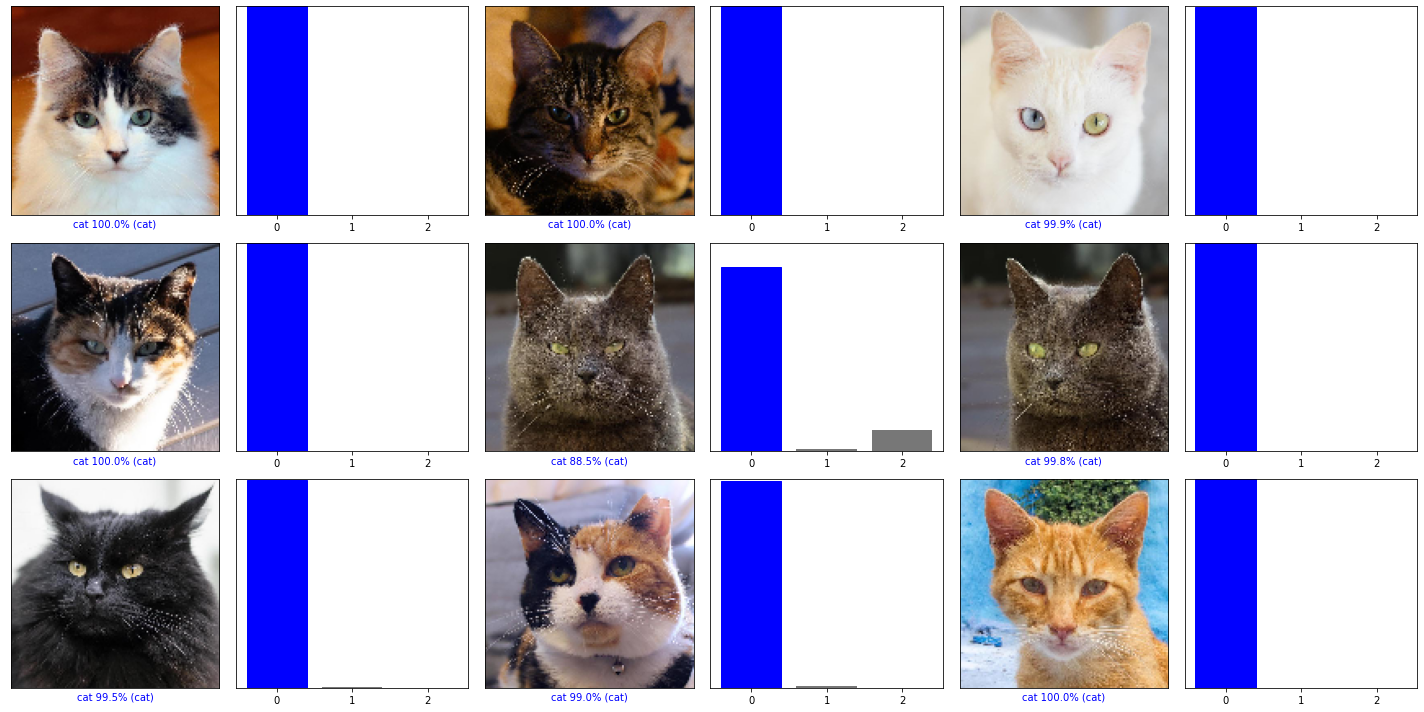

In [32]:
plot_probabilities(cat_labels, cat_images, 0)

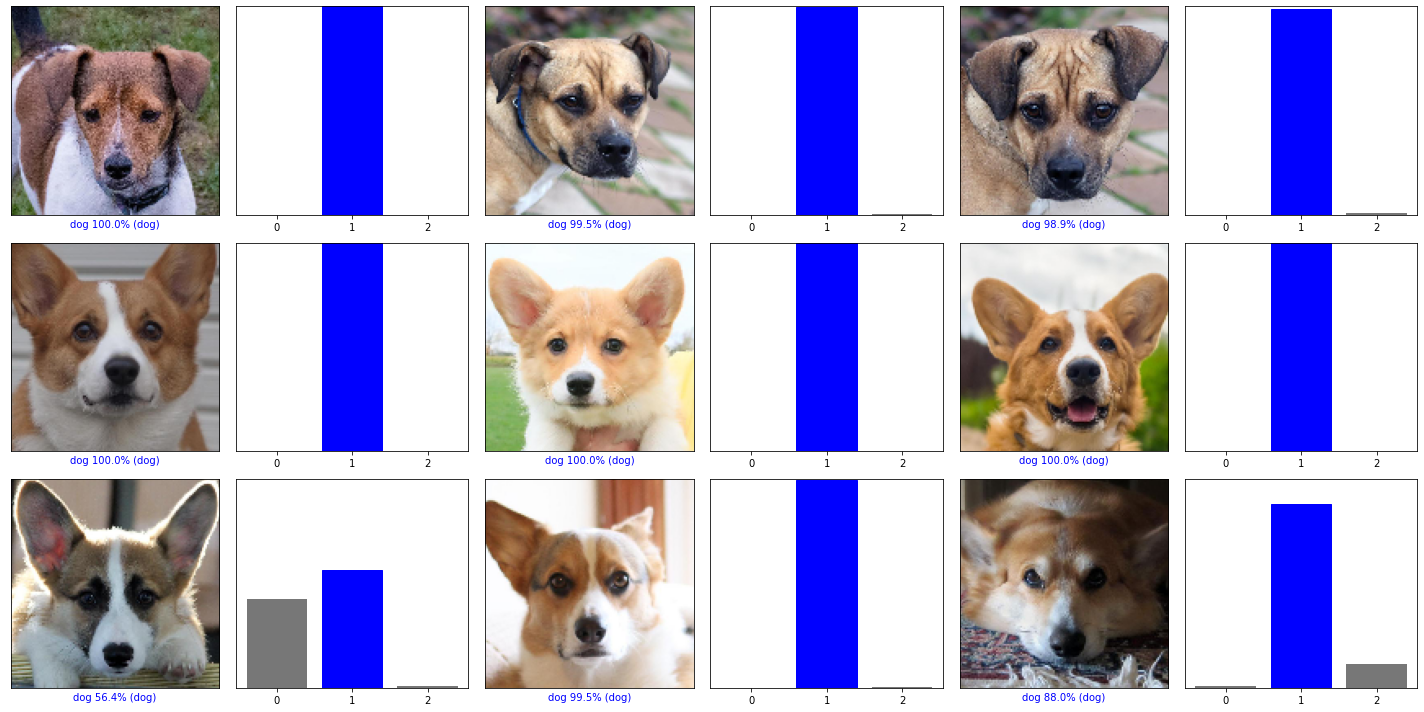

In [33]:
plot_probabilities(dog_labels, dog_images, 4)

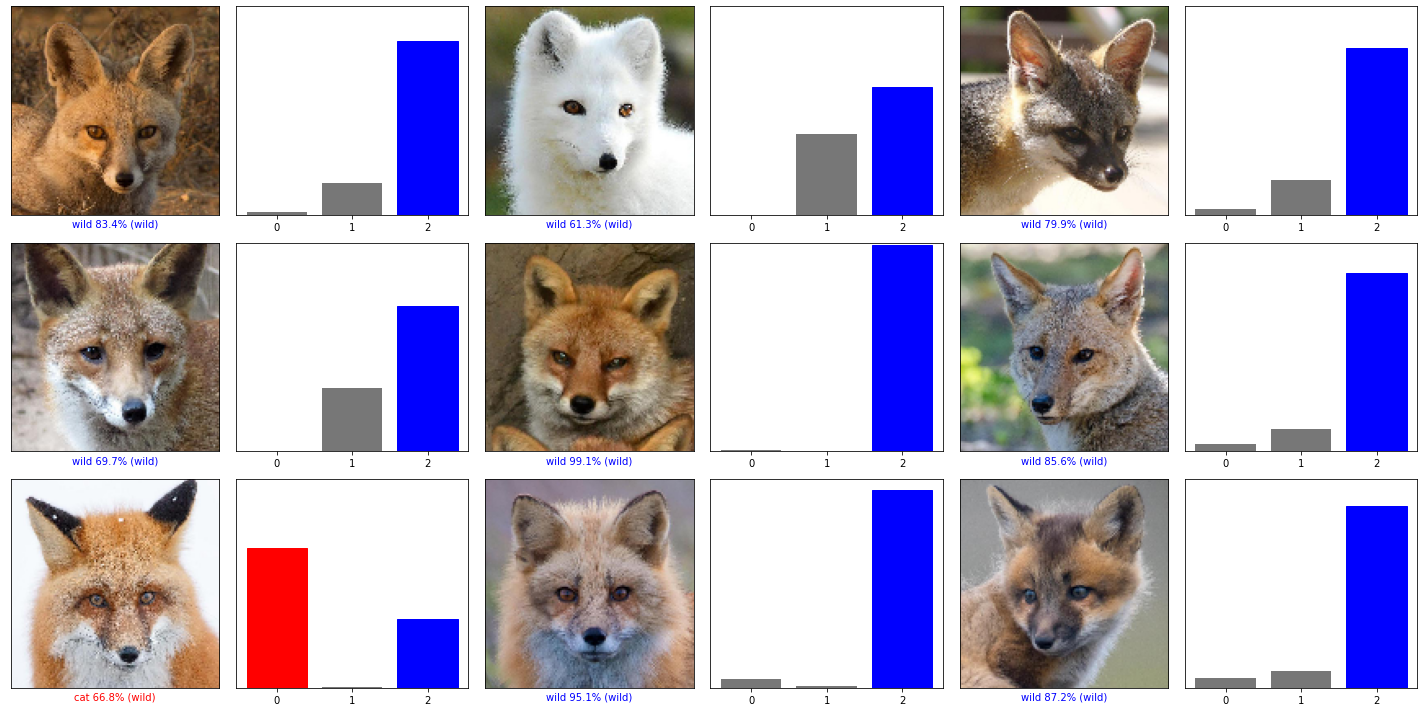

In [34]:
plot_probabilities(wild_labels, wild_images, 9)